In [10]:
from math import sin
from scipy import optimize
from scipy.misc import derivative
import matplotlib.pyplot as plt

### 3. Написать программу, которая построит график функции f(x) = sinx и её производной. Производную считать автоматически, а не вводить формулой.

Построим сетку значений функции и её производной на отрезке [-5,5] c шагом 0.01:

In [11]:
x = [x/100 for x in range(-500, 500, 1)]
y = [sin(x) for x in x]
d = [derivative(sin, x, dx=1e-6) for x in x]

Нарисуем график:

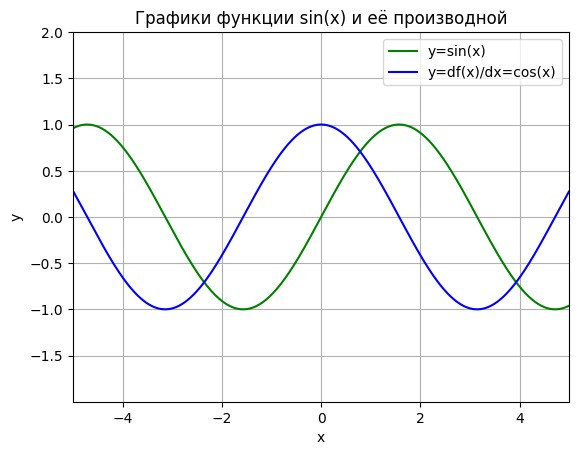

In [12]:
plt.plot(x, y, color='green', label='y=sin(x)')
plt.plot(x, d, color='blue', label='y=df(x)/dx=cos(x)')
plt.xlim(min(x),max(x))
plt.ylim(min([min(y), min(d)])-1, max([max(y), max(d)])+1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики функции sin(x) и её производной')
plt.legend()
plt.grid()
plt.show()

### 4. Написать программу, которая построит поверхность f(x;y) = x^2 − y^2 и её поле направлений.

Попробуем с numpy:

In [13]:
import numpy as np

In [14]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
f = lambda x, y: x**2-y**2

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Построим график функции:

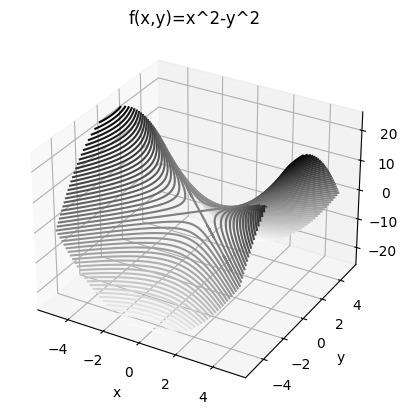

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('f(x,y)=x^2-y^2')
plt.show()

Уменьшим дискретизацию (иначе получим нечитабельный график) и построим поле направлений функции:

In [16]:
x = np.linspace(-5, 5, 18)
y = np.linspace(-5, 5, 18)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [17]:
dz = (2*X, -2*Y) # градиент конечно тоже можно было вычислять через библиотеку, а не руками

normalized_dz0 = dz[0]/np.sqrt(Y**2+X**2)
normalized_dz1 = dz[1]/np.sqrt(X**2+Y**2)

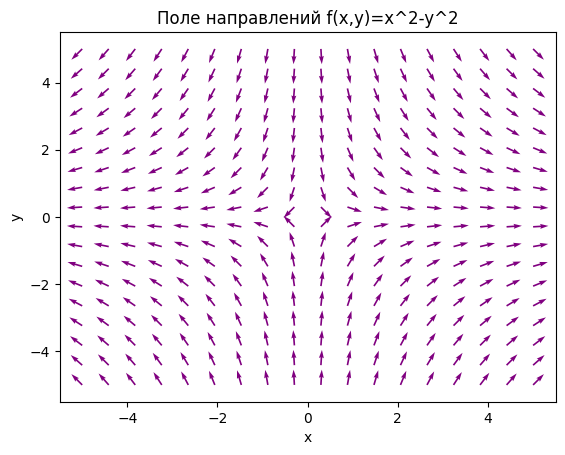

In [18]:
plt.quiver(X, Y, normalized_dz0, normalized_dz1, color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Поле направлений f(x,y)=x^2-y^2')
plt.show()